<a href="https://colab.research.google.com/github/niketkr08/basic-model/blob/main/Clustering_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [158]:
df= pd.read_csv('Project_Dataset.csv')
pd.set_option('display.max_columns',None)

df = df[['Geographic Area Name',
       'Parent Geographic Area Name', 'X', 'Y',
        'Is UN Member',  'Value 2000', 'Value 2001',
       'Value 2002', 'Value 2003', 'Value 2004', 'Value 2005', 'Value 2006',
       'Value 2007', 'Value 2008', 'Value 2009', 'Value 2010', 'Value 2011',
       'Value 2012', 'Value 2013', 'Value 2014', 'Value 2015', 'Value 2016',
       'Value 2017', 'Value 2018', 'Value 2019', 'Value 2020']]

df.rename(columns={'Geographic Area Name':'Country',
       'Parent Geographic Area Name':'Continent', 'X':'Latitude', 'Y':'Longitude',
        'Is UN Member':'UN Member',  'Value 2000':'2000', 'Value 2001':'2001',
       'Value 2002':'2002', 'Value 2003':'2003', 'Value 2004':'2004', 'Value 2005':'2005', 'Value 2006':'2006',
       'Value 2007':'2007', 'Value 2008':'2008', 'Value 2009':'2009', 'Value 2010':'2010', 'Value 2011':'2011',
       'Value 2012':'2012', 'Value 2013':'2013', 'Value 2014':'2014', 'Value 2015':'2015', 'Value 2016':'2016',
       'Value 2017':'2017', 'Value 2018':'2018', 'Value 2019':'2019', 'Value 2020':'2020'},inplace=True)

df.drop_duplicates(inplace=True)


continent_mapping = {
    'Australia and New Zealand': 'Australia/Oceania',
    'Caribbean': 'North America',
    'Central America': 'North America',
    'Central Asia': 'Asia',
    'Channel Islands': 'Europe',
    'Eastern Africa': 'Africa',
    'Eastern Asia': 'Asia',
    'Eastern Europe': 'Europe',
    'Middle Africa': 'Africa',
    'Northern Africa': 'Africa',
    'Northern America': 'North America',
    'Northern Europe': 'Europe',
    'Oceania (exc. Australia and New Zealand)': 'Australia/Oceania',
    'South America': 'South America',
    'South-Eastern Asia': 'Asia',
    'Southern Africa': 'Africa',
    'Southern Asia': 'Asia',
    'Southern Asia (excluding India)': 'Asia',
    'Southern Europe': 'Europe',
    'Western Africa': 'Africa',
    'Western Asia': 'Asia',
    'Western Europe': 'Europe'
}

# Map the continents using the mapping dictionary
df['Continent'] = df['Continent'].map(continent_mapping)

df['Total_Refugees'] = df.loc[:, '2000':'2020'].sum(axis=1)

# df = df[df['Total_Refugees'] != 0]

df.reset_index(inplace=True,drop=True)

In [4]:
df.head(2)

Goal Code Goal Label                             Goal Description   \
0         10    Goal 10  Reduce inequality within and among countries   
1         10    Goal 10  Reduce inequality within and among countries   

   Target Code                                 Target Description  \
0         10.7  Facilitate orderly, safe, regular and responsi...   
1         10.7  Facilitate orderly, safe, regular and responsi...   

  Indicator Code Indicator Reference  \
0        C100704              10.7.4   
1        C100704              10.7.4   

                               Indicator Description Series Release  \
0  Proportion of the population who are refugees,...   2021.Q2.G.03   
1  Proportion of the population who are refugees,...   2021.Q2.G.03   

                                            Tags     Series Code  \
0  ['migration policy', 'migration', 'refugees']  SM_POP_REFG_OR   
1  ['migration policy', 'migration', 'refugees']  SM_POP_REFG_OR   

                                  Series Description  Geographic Area Code  \
0  Number of refugees per 100,000 population, by ...                     4   
1  Number of refugees per 100,000 population, by ...                     4   

  Geographic Area Name  Geographic Area Level  Parent Geographic Area Code  \
0          Afghanistan                      5                          127   
1          Afghanistan                      5                          127   

       Parent Geographic Area Name Geographic Area Type          X          Y  \
0  Southern Asia (excluding India)              Country  66.026882  33.831602   
1  Southern Asia (excluding India)              Country  66.026882  33.831602   

  ISO Code  Is UN Member  Has Country Proile  Unit Multiplier      Units Code  \
0      AFG             1                   1              NaN  PER_100000_POP   
1      AFG             1                   1              NaN  PER_100000_POP   

               Units Desc  Time Series Id  Time Series Keys  \
0  Per 100,000 population  SM_POP_REFG_OR               NaN   
1  Per 100,000 population  SM_POP_REFG_OR               NaN   

   Number of Years Available  Earliest Year Available  Latest Year Available  \
0                         21                     2000                   2020   
1                         21                     2000                   2020   

                                     Available Years  Value 2000  Value 2001  \
0  [2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...   14721.899   14989.179   
1  [2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...   14721.899   14989.179   

   Value 2002  Value 2003  Value 2004  Value 2005  Value 2006  Value 2007  \
0    9996.763    8273.798    8895.939     7786.15    7384.261   10138.719   
1    9996.763    8273.798    8895.939     7786.15    7384.261   10138.719   

   Value 2008  Value 2009  Value 2010  Value 2011  Value 2012  Value 2013  \
0    9272.067    9229.338    9474.811    8127.742    7663.179    7340.715   
1    9272.067    9229.338    9474.811    8127.742    7663.179    7340.715   

   Value 2014  Value 2015  Value 2016  Value 2017  Value 2018  Value 2019  \
0    7218.435    7190.673    6602.829    6742.651    6727.861    6690.218   
1    7218.435    7190.673    6602.829    6742.651    6727.861    6690.218   

   Value 2020  Latest Value  Footnotes           Nature  ObjectId  \
0    6248.987      6248.987        NaN  C: Country data         1   
1    6248.987      6248.987        NaN  C: Country data         2   

             x2            y2  
0  7.350079e+06  4.006213e+06  
1  7.350079e+06  4.006213e+06

In [10]:
df.columns

Index(['Country', 'Continent', 'Latitude', 'Longitude', 'UN Member', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')

In [159]:
def data_cluster(df):
  col = ['2000','2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020']
  return df[col]

In [160]:
def pca_cal(clust):
  scale = StandardScaler()
  clust = scale.fit_transform(clust)

  # Perform PCA
  pca = PCA(n_components=None)  # Keep all components
  pca.fit(clust)

  # Get the explained variance ratio
  explained_variance_ratio = pca.explained_variance_ratio_

  # Calculate the cumulative explained variance
  cumulative_explained_variance = explained_variance_ratio.cumsum()

  # Create a DataFrame for easier visualization
  pca_df = pd.DataFrame({
      'Principal Component': range(1, len(explained_variance_ratio) + 1),
      'Explained Variance Ratio': explained_variance_ratio,
      'Cumulative Explained Variance': cumulative_explained_variance
  })


  print(pca_df.head())



In [161]:
def km_cal(pc_df):
  inertia =[]

  for k in range(1,10):
    kmeans= KMeans(n_clusters = k, random_state=50)
    kmeans.fit(pc_df)
    inertia.append(kmeans.inertia_)

  plt.figure(figsize=(8,5))
  plt.plot(range(1,10),inertia,marker='o')
  plt.title('Elbow analysis for optimal number of clusters')
  plt.xlabel('Number of clusters')
  plt.ylabel('Inertia')
  plt.show()


In [162]:
def plot_pca(df):
  plt.figure(figsize=(6,4))
  sns.scatterplot(x='PC1', y='PC2', palette='viridis', data=df, hue='Clusters')
  plt.title('Scatter Plot of PC1 vs PC2')
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.show()

In [163]:
clust = data_cluster(df)

In [164]:
clust.shape

(245, 21)

In [165]:
clust.head(3)

2000       2001      2002      2003      2004      2005      2006  \
0  14721.899  14989.179  9996.763  8273.798  8895.939  7786.150  7384.261   
1      0.000      0.000     0.000     0.000     0.000     0.000     0.000   
2    216.865    243.105   342.946   331.895   336.204   410.321   457.541   

        2007      2008      2009      2010      2011      2012      2013  \
0  10138.719  9272.067  9229.338  9474.811  8127.742  7663.179  7340.715   
1      0.000     0.000     0.000     0.000     0.000     0.000     0.000   
2    502.930   497.301   525.571   498.582   460.615   429.466   346.753   

       2014      2015      2016      2017      2018      2019      2020  
0  7218.435  7190.673  6602.829  6742.651  6727.861  6690.218  6248.987  
1     0.000     0.000     0.000     0.000     0.000     0.000     0.000  
2   349.428   358.644   381.710   420.117   466.535   518.899   536.958

In [169]:
pca_cal(clust)

   Principal Component  Explained Variance Ratio  \
0                    1                  0.761587   
1                    2                  0.188674   
2                    3                  0.021464   
3                    4                  0.011992   
4                    5                  0.006558   

   Cumulative Explained Variance  
0                       0.761587  
1                       0.950261  
2                       0.971725  
3                       0.983716  
4                       0.990275  


In [170]:
## from the above, we can conclude that first 2 PC represent the 95.02 % of variance in data
## So, we can use top 2 PCA for our study

pca= PCA(n_components=2)
pca_feature = pca.fit_transform(clust)

pc_df = pd.DataFrame(data = pca_feature, columns=['PC1','PC2'])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

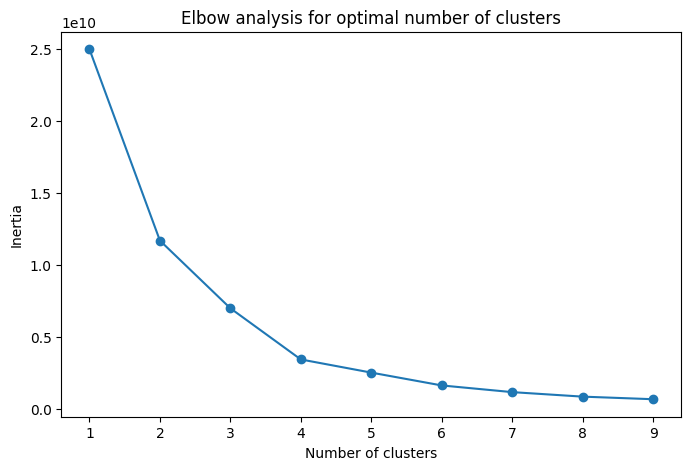

In [171]:
km_cal(pc_df)

In [172]:
## so, optimal_cluster = 4

kmeans = KMeans(n_clusters= 4 ,random_state=50)
df['Clusters'] = kmeans.fit_predict(pc_df)

df['Clusters'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters
0    233
1      8
2      3
3      1
Name: count, dtype: int64

In [173]:
## change below code as per above output

df['Clusters'] = df['Clusters'].replace({2:1, 3:1})

df['PC1'] = pc_df['PC1']
df['PC2'] = pc_df['PC2']

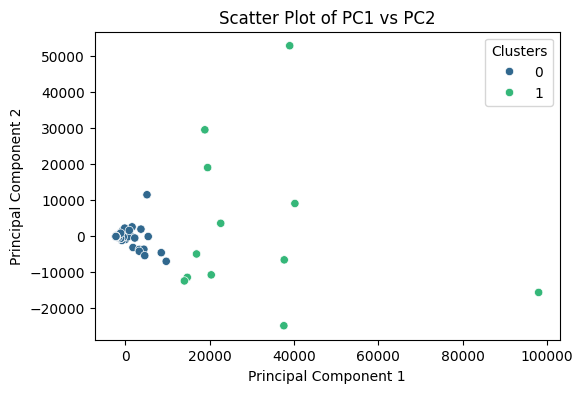

In [174]:
plot_pca(df)

In [176]:
## change below as per above output
# Filter countries with cluster value = 0
c1 = df[df['Clusters'] == 0]

c1.reset_index(inplace=True,drop=True)

In [177]:
c1.head()

Country          Continent    Latitude  Longitude  UN Member  \
0   Åland Islands             Europe   19.809460  60.154490          0   
1         Albania             Europe   20.066609  41.138970          1   
2         Algeria             Africa    2.678164  28.159400          1   
3  American Samoa  Australia/Oceania -170.718727 -14.305873          0   
4         Andorra             Europe    1.576257  42.545486          1   

      2000     2001     2002     2003     2004     2005     2006     2007  \
0    0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
1  216.865  243.105  342.946  331.895  336.204  410.321  457.541  502.930   
2   25.813   26.697   37.932   36.101   32.569   36.259   24.782   31.012   
3    0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
4    0.000    0.000   12.847    9.565    0.000   12.677   12.345   12.093   

      2008     2009     2010     2011     2012     2013     2014     2015  \
0    0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
1  497.301  525.571  498.582  460.615  429.466  346.753  349.428  358.644   
2   26.034   23.111   18.522   16.631   15.130    9.551    9.014    8.734   
3    0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
4    5.962    5.920    5.920    5.970    7.279    6.190    6.312    6.410   

      2016     2017     2018     2019     2020  Total_Refugees  Clusters  \
0    0.000    0.000    0.000    0.000    0.000           0.000         0   
1  381.710  420.117  466.535  518.899  536.958        8632.386         0   
2    9.136    9.714    9.912   10.495   10.701         427.850         0   
3    0.000    0.000    0.000    0.000    0.000           0.000         0   
4    0.000    0.000    0.000    0.000   19.410         128.900         0   

           PC1         PC2  
0 -2207.476850  -80.728430  
1  -410.085236  107.591871  
2 -2113.729187 -118.442434  
3 -2207.476850  -80.728430  
4 -2181.420209  -84.164339

In [178]:
clust1 = data_cluster(c1)

In [179]:
clust1.shape

(233, 21)

In [180]:
pca_cal(clust1)

   Principal Component  Explained Variance Ratio  \
0                    1                  0.573624   
1                    2                  0.158616   
2                    3                  0.117151   
3                    4                  0.086878   
4                    5                  0.038266   

   Cumulative Explained Variance  
0                       0.573624  
1                       0.732240  
2                       0.849391  
3                       0.936269  
4                       0.974535  


In [181]:
##Here, 4 PCs have 93.6% of variance of data
pca1= PCA(n_components=4)
pca_feature1 = pca1.fit_transform(clust1)

pc1_df = pd.DataFrame(data = pca_feature1, columns=['PC1','PC2','PC3', 'PC4'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

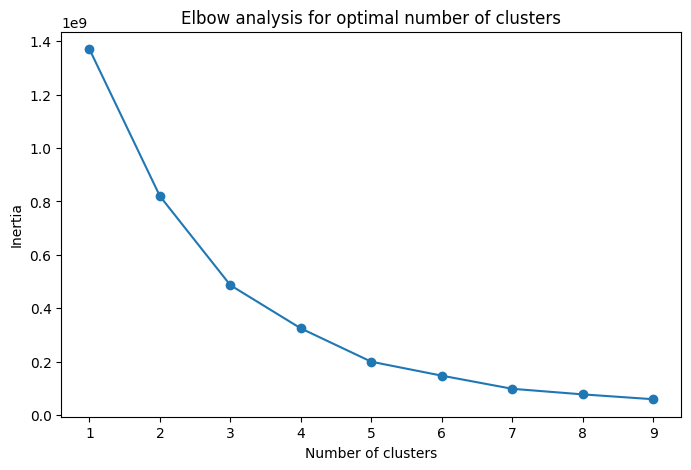

In [182]:
km_cal(pc1_df)

In [187]:
## so, optimal_cluster = 5

kmeans1 = KMeans(n_clusters= 5 ,random_state=50)
c1['Clusters'] = kmeans1.fit_predict(pc1_df)

c1['Clusters'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-187-e92952453e51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['Clusters'] = kmeans1.fit_predict(pc1_df)


Clusters
0    218
1     10
4      3
2      1
3      1
Name: count, dtype: int64

In [188]:
## As value in other clusters are very small, lets club them

c1['Clusters'] = c1['Clusters'].replace({2:1, 3:1, 4:1})

c1['PC1'] = pc1_df['PC1']
c1['PC2'] = pc1_df['PC2']

<ipython-input-188-7dd520364d1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['Clusters'] = c1['Clusters'].replace({2:1, 3:1, 4:1})
<ipython-input-188-7dd520364d1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c1['PC1'] = pc1_df['PC1']
<ipython-input-188-7dd520364d1f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

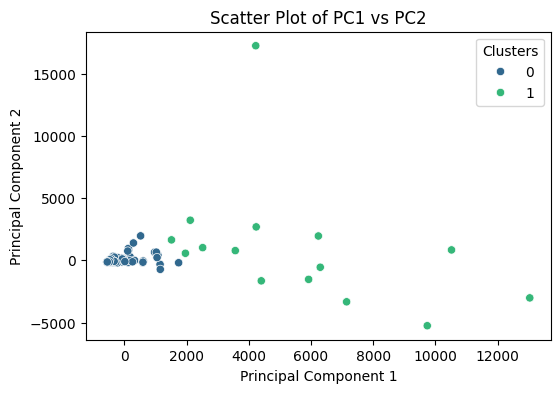

In [189]:
plot_pca(c1)

In [190]:
print('Clusters in Dataset',df['Clusters'].value_counts())

print('Sub-cluster in cluster-1 of the dataset', c1['Clusters'].value_counts())

Clusters in Dataset Clusters
0    233
1     12
Name: count, dtype: int64
Sub-cluster in cluster-1 of the dataset Clusters
0    218
1     15
Name: count, dtype: int64


In [191]:
# Here, we have 3 clusters for our analysis
# cluster A =  cluster - 1 of dataset
# cluster B = sub-cluster - 1 of cluster-1 of dataset
# cluster C = sub-cluster - 0 of cluster-1 of dataset

A = df[df['Clusters']==1][['Country', 'Continent','Total_Refugees']]
B = c1[c1['Clusters']==1][['Country', 'Continent','Total_Refugees']]
C = c1[c1['Clusters']==0][['Country', 'Continent','Total_Refugees']]


In [192]:
# Let's print their mean value of refugees influx

print('Mean value for Cluster A', A['Total_Refugees'].mean())
print('Mean value for Cluster B', B['Total_Refugees'].mean())
print('Mean value for Cluster C', C['Total_Refugees'].mean())

Mean value for Cluster A 152103.33408333335
Mean value for Cluster B 26338.822266666666
Mean value for Cluster C 965.3659908256882


In [193]:
## Here cluster A & B has very high refugee numbers wrt C, lets analyse their geographical properties

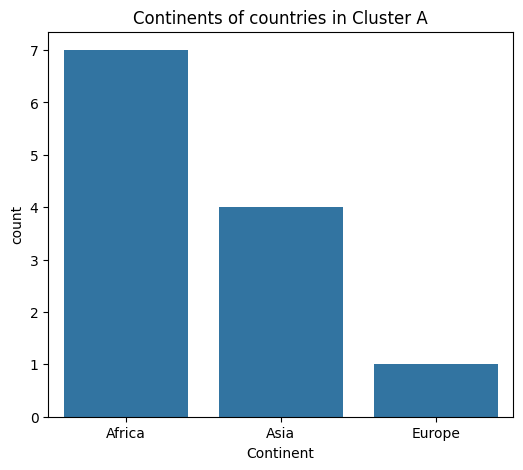

In [194]:
plt.figure(figsize=(6,5))
sns.barplot(A['Continent'].value_counts())
plt.title('Continents of countries in Cluster A')
plt.show()

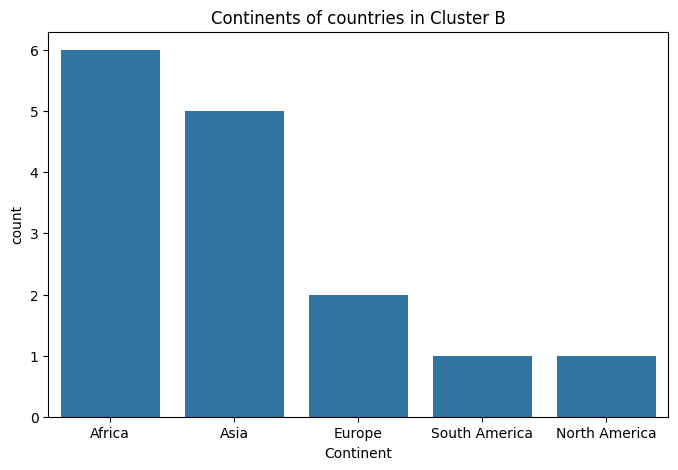

In [195]:
plt.figure(figsize=(8,5))
sns.barplot(B['Continent'].value_counts())
plt.title('Continents of countries in Cluster B')
plt.show()

In [197]:
print('Countries in CLuster A & B',A['Country'].unique(),B['Country'].unique())

Countries in CLuster A & B ['Afghanistan' 'Bhutan' 'Bosnia and Herzegovina' 'Burundi'
 'Central African Republic' 'Eritrea' 'Somalia' 'South Sudan'
 'State of Palestine' 'Syrian Arab Republic' 'Western Sahara' 'Liberia'] ['Angola' 'Azerbaijan' 'Croatia' 'Democratic Republic of the Congo'
 'Serbia' 'Sierra Leone' 'Sri Lanka' 'Sudan' 'Timor-Leste'
 'Venezuela (Bolivarian Republic of)' 'Iraq' 'Mauritania' 'Myanmar'
 'Rwanda' 'Saint Vincent and the Grenadines']


In [198]:
## Based on above result of continents and countries data, we can study their policies and economic condition
## which affect the number of refugees of that countries